In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)
import time
%matplotlib ipympl

In [2]:

from scipy import signal

sos = signal.butter(3, [1,100], 'bp', fs=10000, output='sos')

In [3]:
time = np.arange(0,12000,.1)

In [4]:
EEGs = np.load('1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/EEGs.npy',allow_pickle=True).item()
total = np.load('1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/total.npy')



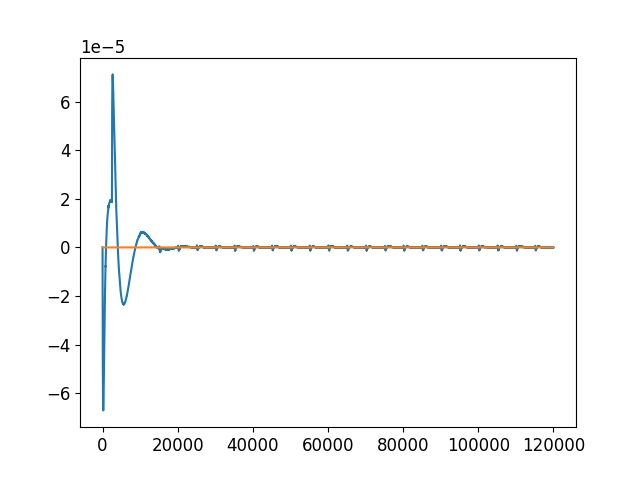

In [5]:
plt.plot(total)

In [5]:
for i in range(10):

    if i == 0:

        out_original = np.genfromtxt('1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/'+str(i)+'/reporting/out.dat')

    else:

        out_original = np.vstack((out_original,np.genfromtxt('1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/'+str(i)+'/reporting/out.dat')))


In [6]:
out2 = np.genfromtxt('/gpfs/bbp.cscs.ch/project/proj83/scratch/home/isbister/post_physiology_2023/sim_data/debugging_tests/5_debugging_test_30-11-23/2919081d-a24b-4961-8f53-998f2af9f620/0/reporting/out.dat')


In [57]:
def getHistByLayer(spikes, simulation):

    c = s.circuit
    layerDF = list(c.nodes.get(group='hex_O1',properties=['layer']))[0][1].loc['S1nonbarrel_neurons']

    spikes_by_layer = []
    bins_by_layer = []

    fig = plt.figure(figsize=(4,4))

    ax = fig.add_subplot(111)

    for layer in np.arange(1,7):

        layerIds = list(layerDF[layerDF['layer']==layer].index)

        spikes_layer = spikes[np.isin(spikes[:,1],layerIds)]

        spike_hist,bins = np.histogram(spikes_layer[:,0],bins=int(500*12000/2500))

        bins = (bins[:-1]+bins[1:])/2

        
        ax.plot(bins,spike_hist/2)
        
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Spikes')
    ax.set_xlim([1975,2200])
    
    plt.tight_layout()
    plt.show()
                

In [40]:
spikes_original,bins_original = np.histogram(out_original[:,0],bins=int(1000*12000/2500))
bins_original = (bins_original[:-1]+bins_original[1:])/2

spikes_ref,bins_ref = np.histogram(out2[:,0],bins=1000)
bins_ref = (bins_ref[:-1]+bins_ref[1:])/2


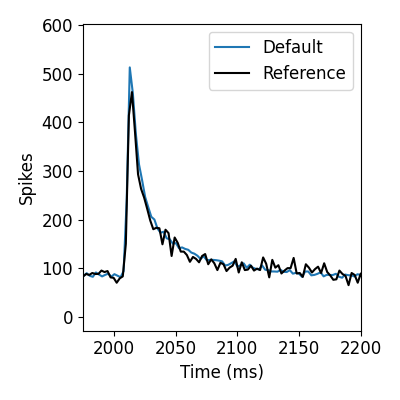

In [41]:
plt.figure(figsize=(4,4))


plt.plot(bins_original,spikes_original/10)
plt.plot(bins_ref,spikes_ref,'k')

plt.xlabel('Time (ms)')
plt.ylabel('Spikes')
plt.legend(['Default','Reference'])
plt.xlim([1975,2200])
plt.tight_layout()
plt.show()

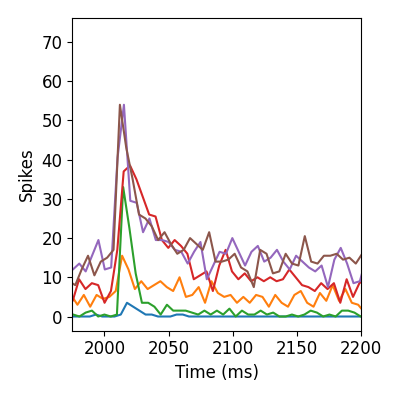

In [58]:
import bluepysnap as bp

s = bp.Simulation('1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/0/simulation_config.json')
getHistByLayer(out_original,s)
